# Is there a relationship between labels' genre diversity and labels' average score?

$H_o$: The label with the most genre diversity will not have a higher average score than the label with the least genre diversity.

$H_a$: The label with the most genre diversity will have a higher average score than the label with the least genre diversity.

$\alpha$: 0.05

# Data Extraction

In [1]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np

db_path = 'postgres:///music'
engine = create_engine(db_path)

table_names = engine.table_names()

table_names

['reviews', 'artists', 'genres', 'labels', 'years', 'content']

# Data Investigation

In [2]:
def postgres_to_df(table):
    """Selects data from passed table and returns a dataframe of the data"""
    engine = create_engine(db_path)
    conn = engine.connect()
    result = conn.execute(f'''
    SELECT * FROM {table}''')
    columns = [x for x in result.keys()]
    df = pd.DataFrame(result.fetchall(),columns=columns)
    return df

In [3]:
postgres_to_df('reviews')

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017
5,22722,insecure (music from the hbo original series),various artists,http://pitchfork.com/reviews/albums/22722-inse...,7.4,0,vanessa okoth-obbo,contributor,2017-01-05,3,5,1,2017
6,22704,stillness in wonderland,little simz,http://pitchfork.com/reviews/albums/22704-litt...,7.1,0,katherine st. asaph,contributor,2017-01-05,3,5,1,2017
7,22694,tehillim,yotam avni,http://pitchfork.com/reviews/albums/22694-tehi...,7.0,0,andy beta,contributor,2017-01-05,3,5,1,2017
8,22714,reflection,brian eno,http://pitchfork.com/reviews/albums/22714-refl...,7.7,0,andy beta,contributor,2017-01-04,2,4,1,2017
9,22724,filthy america its beautiful,the lox,http://pitchfork.com/reviews/albums/22724-filt...,5.3,0,ian cohen,contributor,2017-01-04,2,4,1,2017


In [4]:
engine = create_engine(db_path)
conn = engine.connect()
result = conn.execute(f'''
SELECT * FROM reviews 
    JOIN genres ON reviews.reviewid=genres.reviewid
    JOIN labels ON reviews.reviewid=labels.reviewid''')
columns = [x for x in result.keys()]
df = pd.DataFrame(result.fetchall(),columns=columns)

In [5]:
df.head()

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,reviewid,genre,reviewid,label
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,22703,electronic,22703,virgin
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,22721,metal,22721,hathenter
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,22659,rock,22659,fashionable idiots
3,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,22659,rock,22659,static shock
4,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,22661,rock,22661,mississippi


# Data Manipulation

In [6]:
result = conn.execute('''
    SELECT COUNT(DISTINCT(genre)) as genrecounts, label, AVG(score) FROM reviews
        JOIN genres ON reviews.reviewid=genres.reviewid
        JOIN labels ON reviews.reviewid=labels.reviewid
        GROUP BY label''')

columns = [x for x in result.keys()]
df = pd.DataFrame(result.fetchall(),columns=columns)

In [7]:
df.sort_values(by='genrecounts', ascending=False)


,genrecounts,label,avg
3244,9,thrill jockey,7.004375
203,9,anti-,6.997391
2966,9,sony,6.855556
3501,9,warner bros.,6.563452
3188,8,temporary residence,7.009091
3504,8,warp,7.081590
3096,8,sub pop,7.103561
698,8,columbia,6.811157
2831,8,self-released,6.943789
585,8,capitol,6.468667


# Random Sampling

In [8]:
engine = create_engine(db_path)
conn = engine.connect()
result = conn.execute(f'''
SELECT * FROM reviews 
    JOIN genres ON reviews.reviewid=genres.reviewid
    JOIN labels ON reviews.reviewid=labels.reviewid''')
columns = [x for x in result.keys()]
df = pd.DataFrame(result.fetchall(),columns=columns)

In [9]:
np.random.seed(1)
sample_most_genre = np.random.choice(df[df['label'].isin(['thrill jockey','anti-','sony',
                                                      'warner bros.'])]['score'], size=200)
sample_most_genre

array([ 7.8,  7.7,  7.1,  6.7,  8.2,  8.1,  7.3,  6.7,  6. ,  7.2,  6.8,
        6.5,  7.4,  7. ,  4.8,  7. ,  4.2,  9.6,  3.8,  6.7,  6. ,  7. ,
        6. ,  5.8,  8. ,  6.8,  8. ,  7.7,  7.4,  5.8,  6.7,  7.2,  8.1,
        7.7,  6.2,  7.5,  7.4,  7.7,  6.7,  7.7,  8.4,  7.6,  7.7,  6.5,
        8.1,  6.7,  6.6,  4.7,  6.2,  7.1, 10. ,  5.2,  7. ,  4. ,  7.6,
        9.2,  6.8,  5.8, 10. ,  8. ,  4.1,  7.1,  5.5,  6.5,  7.1,  7.6,
        7.7,  8.7, 10. ,  7.6,  6.7,  7.5,  6.2,  7.5,  7.6,  7.9,  7.7,
        2.9,  5.9,  7. ,  5.7,  5.8,  7.2,  7.2,  6.6,  8.1,  7.7,  7.9,
        6.9,  6.2,  7.5,  7.5,  6.5,  6.6,  7.1,  6.7,  9.4,  8. ,  7.8,
        6.1,  6.2,  6.4,  8.4,  5.9,  6.9,  6.7,  7.7,  7.5,  7.6,  8.1,
        7.7,  6.6,  1.9,  7.6,  7. ,  5.4,  4.2,  8.3,  5.2,  3.3,  6.6,
        7.4,  6.2,  6.9,  2. ,  5.9,  5.5,  3.3,  4. ,  8.1,  8.7,  7.3,
        8.2,  9.2,  6.5,  7.7,  6.9,  8.5,  7.7,  9.2,  3.6,  5.3,  4.2,
        8.1,  7.5,  7.2,  8.1,  6.9,  6.5,  8.1,  7

In [10]:
result = conn.execute('''
    SELECT COUNT(genre) as genrecounts, label, AVG(score) FROM reviews
        JOIN genres ON reviews.reviewid=genres.reviewid
        JOIN labels ON reviews.reviewid=labels.reviewid
        GROUP BY label''')

columns = [x for x in result.keys()]
df = pd.DataFrame(result.fetchall(),columns=columns)

In [11]:
np.random.seed(1)
sample_one_genre = np.random.choice(df[df['genrecounts']==1]['avg'], size=200)

sample_one_genre

array([ 7.80000019,  6.9000001 ,  7.79999995,  8.60000038,  8.23333343,
        6.5       ,  7.5999999 ,  7.        ,  5.0999999 ,  7.19999981,
        7.19999981,  6.80000019,  6.69999981,  6.69999981,  7.80000019,
        7.5999999 ,  6.9000001 ,  7.19999981,  5.        ,  6.        ,
        7.80000019,  5.9000001 ,  7.30000019,  7.9000001 ,  8.39999962,
        7.5999999 ,  7.19999981,  7.0999999 ,  6.5999999 ,  7.5       ,
        6.30000019,  7.69999981,  7.45000005,  8.10000038,  6.        ,
        6.4000001 ,  7.30000019,  8.10000038,  7.30000019,  3.79999995,
        7.45000005,  7.4000001 ,  6.30000019,  7.9000001 ,  7.45000005,
        5.80000019,  9.        ,  7.4000001 ,  8.39999962,  6.80000019,
        7.80000019,  6.69999981,  8.        ,  7.69999981,  7.4000001 ,
        6.4000001 ,  2.70000005,  7.75      ,  6.69999981,  7.4000001 ,
        8.4000001 ,  7.4000001 ,  7.5       ,  8.10000038,  5.80000019,
        6.9000001 ,  9.5       ,  5.        ,  7.5       ,  7.40

# Sampling Distributions

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


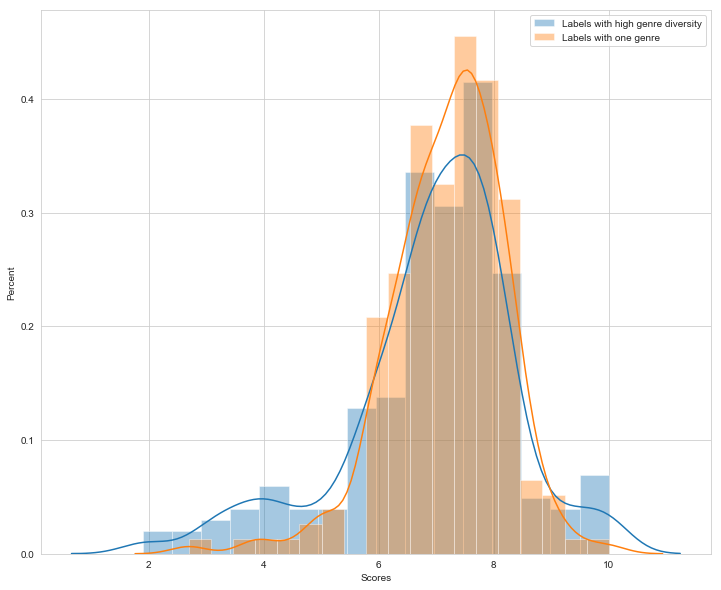

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

plt.figure(figsize=(12, 10))
sns.distplot(sample_most_genre,label='Labels with high genre diversity')
sns.distplot(sample_one_genre,label='Labels with one genre')
plt.xlabel('Scores')
plt.ylabel('Percent')
plt.legend();

# Sampling Statistics

In [13]:
from scipy import stats

p = stats.ttest_ind(sample_most_genre, sample_one_genre)
print(f'p-value: {p[1]/2}')
print(f't-stat: {p[0]}')

p-value: 0.014775736699031193
t-stat: -2.1839172819740216


# Conclusion: 
Since our p-value is below the threshold of .05, we succeed in rejecting the null hypothesis in favor of the alternative hypothesis. This means that the label with the most genre diversity will have higher scores than the labels with the least genre diversity.

In [14]:
sample_size = 200
most_genre_mean = np.mean(sample_most_genre)
most_genre_sd = np.std(sample_most_genre)
one_genre_mean = np.mean(sample_one_genre)
one_genre_sd = np.std(sample_one_genre)

n_sim = 1000

np.random.seed(1)
p = np.empty(n_sim)
p.fill(np.nan)

for x in range(n_sim):
    most_genre = np.random.normal(loc=most_genre_mean, scale=most_genre_sd, size=sample_size)
    one_genre = np.random.normal(loc=one_genre_mean, scale=one_genre_sd, size=sample_size)
    t_test = stats.ttest_ind(most_genre, one_genre)
    p[x] = t_test[1]
    
num_null_rejects = np.sum(p < .05)
reject_proportion = num_null_rejects / n_sim
reject_proportion
    

0.587

## Power

If a large effect is truly present between the sample of most artists label and the sample of least artists labels groups, then the null hypothesis (i.e. no difference with alpha 0.05) would be rejected 58.7% of times. This confirms that the label with the most genres will generate scores higher than the labels with one genre.